In [0]:
dbutils.fs.head('/FileStore/tables/clinicaltrial_2021.csv')

[Truncated to first 65536 bytes]
Out[22]: "Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions\r\nNCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||\r\nNCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|\r\nNCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|\r\nNCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|\r\nNCT02758860|University of Roma La Sapienza|Active, not recruiting|Jun 2016|Sep 2020|Observational [Patient Registry]|Apr 2016|Diverticular Diseases,Diverticulum,Diverticulosis|\r\nNCT02757209|Consorzio Futuro in Ricerca|Completed|Apr 2016|Jan 2018|Interventional|Apr 2016|Asthma|Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate\r\nNCT02752438|Ankara University|Unk

In [0]:
dbutils.fs.head('/FileStore/tables/mesh.csv')

[Truncated to first 65536 bytes]
Out[23]: 'term,tree\r\nCalcimycin,D03.633.100.221.173\r\nA-23187,D03.633.100.221.173\r\nTemefos,D02.705.400.625.800\r\nTemefos,D02.705.539.345.800\r\nTemefos,D02.886.300.692.800\r\nAbate,D02.705.400.625.800\r\nAbate,D02.705.539.345.800\r\nAbate,D02.886.300.692.800\r\nDifos,D02.705.400.625.800\r\nDifos,D02.705.539.345.800\r\nDifos,D02.886.300.692.800\r\nAbattoirs,J01.576.423.200.700.100\r\nAbattoirs,J03.540.020\r\nAbbreviations as Topic,L01.559.598.400.556.131\r\nAcronyms as Topic,L01.559.598.400.556.131\r\nAbdomen,A01.923.047\r\n"Abdomen, Acute",C23.888.592.612.054.200\r\n"Abdomen, Acute",C23.888.821.030.249\r\nAbdominal Injuries,C26.017\r\nAbdominal Neoplasms,C04.588.033\r\nAbdominal Muscles,A02.633.567.050\r\nCremaster Muscle,A02.633.567.050\r\nPyramidalis Muscle,A02.633.567.050\r\nQuadratus Abdominis,A02.633.567.050\r\nTransversus Abdominis,A02.633.567.050\r\nAbducens Nerve,A08.800.800.120.030\r\nAbelson murine leukemia virus,B04.613.807.375.525.020\

In [0]:
dbutils.fs.head('/FileStore/tables/pharma.csv')

[Truncated to first 65536 bytes]
Out[24]: '"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"\n"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to in

In [0]:
myRDD1=sc.textFile('/FileStore/tables/clinicaltrial_2021.csv')\
    .filter(lambda h: not h.startswith('I'))
myRDD1.count()

Out[25]: 387261

In [0]:
myRDD2=myRDD1.map(lambda s:s.split("|"))
extractRDD=myRDD2.map(lambda cond:cond[5])
groupRDD=extractRDD.map(lambda s:(s,1))
reduceRDD=groupRDD.reduceByKey(lambda s1,s2: s1+s2)
revertRDD=reduceRDD.map(lambda s:(s[1],s[0])).sortByKey(ascending=False).map(lambda s:(s[1],s[0]))
revertRDD.take(5)

Out[26]: [('Interventional', 301472),
 ('Observational', 77540),
 ('Observational [Patient Registry]', 8180),
 ('Expanded Access', 69)]

In [0]:
EtractedRDD=myRDD2.map(lambda t:t[7])\
   .filter(lambda h:h.strip())
tractedRDD=EtractedRDD.flatMap(lambda s:s.split(","))
groupedRDD=tractedRDD.map(lambda k:(k,1))
reducedRDD=groupedRDD.reduceByKey(lambda k1,k2: k1+k2)
revertedRDD=reducedRDD.map(lambda k:(k[1],k[0])).sortByKey(ascending=False).map(lambda k:(k[1],k[0]))
revertedRDD.take(5)

Out[27]: [('Carcinoma', 13389),
 ('Diabetes Mellitus', 11080),
 ('Neoplasms', 9371),
 ('Breast Neoplasms', 8640),
 ('Syndrome', 8032)]

In [0]:
meshRDD=sc.textFile('/FileStore/tables/mesh.csv')\
    .filter(lambda h: not h.startswith('t'))
meshRDD1=meshRDD.map(lambda s:s.split(","))
invertRDD=meshRDD1.map(lambda h:(h[1],h[0]))
meshRDD2=meshRDD1.map(lambda t:(t[0],t[1].split(".")[0]))

In [0]:
clinicalList=meshRDD2.join(groupedRDD)\
    .map(lambda entry: entry[1][0])
mapListRDD=clinicalList.map(lambda k:(k,1))
mergedRDD=mapListRDD.reduceByKey(lambda k1,k2: k1+k2)
rearrangedRDD=mergedRDD.map(lambda k:(k[1],k[0])).sortByKey(ascending=False).map(lambda k:(k[1],k[0]))
rearrangedRDD.take(5)

Out[29]: [('C04', 143994),
 ('C23', 136079),
 ('C01', 106674),
 ('C14', 94523),
 ('C10', 92310)]

In [0]:
pharmaRDD=sc.textFile('/FileStore/tables/pharma.csv')
splitPharma=pharmaRDD.map(lambda s:(s.split(",")))\
    .map(lambda h:(h[1]).replace('"',''))  
myRDD5=myRDD2.map(lambda t:t[1])
TestRDD=myRDD5.subtract(splitPharma)
parentRDD=TestRDD.map(lambda k:(k,1))
nonpharmaRDD=parentRDD.reduceByKey(lambda k1,k2: k1+k2)
noPharmaRDD=nonpharmaRDD.map(lambda k:(k[1],k[0])).sortByKey(ascending=False).map(lambda k:(k[1],k[0]))
noPharmaRDD.take(10)

Out[30]: [('National Cancer Institute (NCI)', 3218),
 ('M.D. Anderson Cancer Center', 2414),
 ('Assistance Publique - Hôpitaux de Paris', 2369),
 ('Mayo Clinic', 2300),
 ('Merck Sharp & Dohme Corp.', 2243),
 ('Assiut University', 2154),
 ('Novartis Pharmaceuticals', 2088),
 ('Massachusetts General Hospital', 1971),
 ('Cairo University', 1928),
 ('Hoffmann-La Roche', 1828)]

In [0]:
myRDD11=myRDD2.map(lambda t:(t[2],t[6]))\
    .filter(lambda h:"Completed"==h[0])\
    .filter(lambda j:"2021" in j[1])
bokehRDD=myRDD11.map(lambda k:(k[1],1))
getPlotRDD=bokehRDD.reduceByKey(lambda k1,k2: k1+k2)
plotRDD=getPlotRDD.map(lambda k:(k[1],k[0])).sortByKey(ascending=False).map(lambda k:(k[1],k[0]))
plotRDD.take(15)

Out[38]: [('Jan 2021', 633),
 ('Mar 2021', 619),
 ('Feb 2021', 541),
 ('Apr 2021', 514),
 ('Jun 2021', 489),
 ('May 2021', 449),
 ('Jul 2021', 402),
 ('Aug 2021', 330),
 ('Sep 2021', 298),
 ('Oct 2021', 112)]

In [0]:
df_csv = spark.read.options(header='True', inferSchema='True', delimiter='|') \
  .csv("/FileStore/tables/clinicaltrial_2021.csv")
df_csv.count()

Out[1]: 387261

In [0]:
df_test=df_csv.groupBy('Type').count()
df_test.sort('Count',ascending=False).show()

+--------------------+------+
|                Type| count|
+--------------------+------+
|      Interventional|301472|
|       Observational| 77540|
|Observational [Pa...|  8180|
|     Expanded Access|    69|
+--------------------+------+



In [0]:
from pyspark.sql.functions import explode
from pyspark.sql.functions import split, col
exDF=df_csv.withColumn('Conditions',explode(split(df_csv['conditions'],',')))
countDF=exDF.groupBy('conditions').count()
countDF.sort('Count',ascending=False).show(5)

+-----------------+-----+
|       conditions|count|
+-----------------+-----+
|        Carcinoma|13389|
|Diabetes Mellitus|11080|
|        Neoplasms| 9371|
| Breast Neoplasms| 8640|
|         Syndrome| 8032|
+-----------------+-----+
only showing top 5 rows



In [0]:
mesh_csv = spark.read.options(header='True', inferSchema='True', delimiter=',') \
  .csv("/FileStore/tables/mesh.csv")
treeDF=mesh_csv.withColumn('tree',col('tree').substr(1,3))
meshTreeDF=treeDF.join(exDF,exDF.Conditions==treeDF.term,"inner")
treshDF=meshTreeDF.groupBy('tree').count()
treshDF.sort('count',ascending=False).show(5)

+----+------+
|tree| count|
+----+------+
| C04|143994|
| C23|136079|
| C01|106674|
| C14| 94523|
| C10| 92310|
+----+------+
only showing top 5 rows



In [0]:
pharma_csv = spark.read.options(header='True', inferSchema='True', delimiter=',') \
  .csv("/FileStore/tables/pharma.csv")
nonPharmaDF=pharma_csv.select('Parent_Company')
acadDF=df_csv.select('Sponsor')
kt_DF=acadDF.join(nonPharmaDF,pharma_csv.Parent_Company==acadDF.Sponsor,"leftanti")
uosDF=kt_DF.groupBy('Sponsor').count()
uosDF.sort('count',ascending=False).show(10)

+--------------------+-----+
|             Sponsor|count|
+--------------------+-----+
|National Cancer I...| 3218|
|M.D. Anderson Can...| 2414|
|Assistance Publiq...| 2369|
|         Mayo Clinic| 2300|
|Merck Sharp & Doh...| 2243|
|   Assiut University| 2154|
|Novartis Pharmace...| 2088|
|Massachusetts Gen...| 1971|
|    Cairo University| 1928|
|   Hoffmann-La Roche| 1828|
+--------------------+-----+
only showing top 10 rows



In [0]:
CompDF=df_csv.select('Submission').filter((df_csv.Status=='Completed')&(df_csv.Submission.contains('2021')))
sDF=CompDF.withColumn('Submission',col('Submission').substr(1,3))
tresDF=sDF.groupBy('Submission').count()
tresDF.orderBy('count',ascending=False).show()

+----------+-----+
|Submission|count|
+----------+-----+
|       Jan|  633|
|       Mar|  619|
|       Feb|  541|
|       Apr|  514|
|       Jun|  489|
|       May|  449|
|       Jul|  402|
|       Aug|  330|
|       Sep|  298|
|       Oct|  112|
+----------+-----+



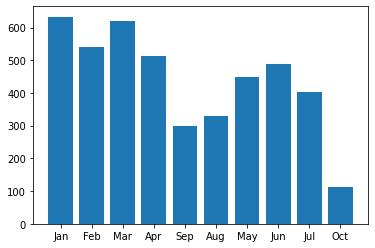

In [0]:
x=tresDF.toPandas()["Submission"].values.tolist()
y=tresDF.toPandas()["count"].values.tolist()
plt.bar(x,y)
plt.show()